# Hacker: Al Smith

Testing script for a simplified version of GET3D using voxelgrid to create geometries of Dynamic Reference Frames provided by the I-Star Lab at JHU: https://github.com/I-STAR/DRF/tree/main/3D_Models/DRFs_with_posts/APPLE


In [1]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import trimesh
import io
import pyrender
import random
from skimage import measure
import open3d as o3d

import io
from IPython.display import display, Image as IPythonImage

import matplotlib
#matplotlib.use('Agg')  # Use non-interactive backend
import matplotlib.pyplot as plt
import scipy.ndimage


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms

import ipywidgets as widgets
from IPython.display import display, clear_output

# Set device (CPU or GPU)
device = torch.device('mps' if torch.mps.is_available() else 'cpu')
print(f'Using device: {device}')


/Users/alsmith/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Using device: mps


In [2]:
def look_at(origin, target, up=np.array([0, 1, 0])):
    """
    Creates a camera pose matrix looking from origin to target with the specified up vector.
    """
    forward = target - origin
    forward /= np.linalg.norm(forward)
    
    right = np.cross(forward, up)
    right /= np.linalg.norm(right)
    
    true_up = np.cross(right, forward)
    
    # Create rotation matrix
    rotation = np.eye(4)
    rotation[:3, :3] = np.stack([right, true_up, -forward], axis=-1)
    
    # Create translation matrix
    translation = np.eye(4)
    translation[:3, 3] = origin
    
    # Camera pose matrix
    pose = translation @ rotation
    return pose

def render_single_image_pyrender(mesh_path, image_index, image_dir, image_size=256, fov_y=np.pi / 3.0):
    """
    Renders a single image of the mesh with random rotation and saves it.
    """
    try:
        # Load the mesh
        mesh = trimesh.load(mesh_path)
        
        if mesh.is_empty:
            print(f"Skipped {os.path.basename(mesh_path)} because it's empty.")
            return
        
        # Normalize and center the mesh
        mesh.apply_translation(-mesh.centroid)
        scale_factor = 1.0 / np.max(mesh.extents)
        mesh.apply_scale(scale_factor)
        
        # Apply random rotation
        random_rotation = trimesh.transformations.random_rotation_matrix()
        mesh.apply_transform(random_rotation)
        
        # Set up camera parameters
        camera_distance = 1.25  # Adjust as needed
        camera_position = np.array([0, 0, camera_distance])
        camera_target = np.array([0, 0, 0])
        camera_pose = look_at(camera_position, camera_target)
        
        # Create a pyrender scene
        scene = pyrender.Scene(bg_color=[255, 255, 255, 255], ambient_light=[0.5, 0.5, 0.5])
        mesh_pyrender = pyrender.Mesh.from_trimesh(mesh, smooth=False)
        scene.add(mesh_pyrender)
        
        # Add camera to the scene
        camera = pyrender.PerspectiveCamera(yfov=fov_y)
        scene.add(camera, pose=camera_pose)
        
        # Add lights
        light = pyrender.DirectionalLight(color=np.ones(3), intensity=2.0)
        scene.add(light, pose=camera_pose)
        
        # Initialize offscreen renderer
        renderer = pyrender.OffscreenRenderer(viewport_width=image_size, viewport_height=image_size)
        
        # Render the scene
        color, depth = renderer.render(scene)
        renderer.delete()
        
        # Convert to grayscale and save
        image = Image.fromarray(color)
        image = image.convert('L')  # Convert to grayscale
        
        # Create a unique filename
        mesh_name = os.path.splitext(os.path.basename(mesh_path))[0]
        image_filename = f"{mesh_name}_{image_index}.png"
        image.save(os.path.join(image_dir, image_filename))
        print(f"Rendered and saved {image_filename}")
    
    except Exception as e:
        print(f"Error rendering {os.path.basename(mesh_path)}: {e}")

def generate_images(mesh_dir, image_dir, num_images_per_mesh=10, image_size=256, fov_y=np.pi / 3.0):
    """
    Generates images for each mesh in the mesh directory.
    """
    os.makedirs(image_dir, exist_ok=True)
    mesh_files = [f for f in os.listdir(mesh_dir) if f.lower().endswith(('.stl', '.obj'))]
    
    for mesh_file in mesh_files:
        mesh_path = os.path.join(mesh_dir, mesh_file)
        print(f"Processing mesh: {mesh_file}")
        for i in range(num_images_per_mesh):
            render_single_image_pyrender(mesh_path, i, image_dir, image_size, fov_y)

# Define paths
mesh_dir = './stl_models/'         # Directory containing your CAD models
image_dir = './rendered_images/'   # Directory to save rendered images

# Generate images
generate_images(mesh_dir, image_dir, num_images_per_mesh=10, image_size=256)


Processing mesh: link3.stl


2024-11-19 22:51:37.064 Python[28042:530959] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/yy/369dcxz16j5_3ymthbb030vh0000gq/T/com.apple.python3.savedState


Rendered and saved link3_0.png
Rendered and saved link3_1.png
Rendered and saved link3_2.png
Rendered and saved link3_3.png
Rendered and saved link3_4.png
Rendered and saved link3_5.png
Rendered and saved link3_6.png
Rendered and saved link3_7.png
Rendered and saved link3_8.png
Rendered and saved link3_9.png
Processing mesh: link2.stl
Rendered and saved link2_0.png
Rendered and saved link2_1.png
Rendered and saved link2_2.png
Rendered and saved link2_3.png
Rendered and saved link2_4.png
Rendered and saved link2_5.png
Rendered and saved link2_6.png
Rendered and saved link2_7.png
Rendered and saved link2_8.png
Rendered and saved link2_9.png
Processing mesh: link0.stl
Rendered and saved link0_0.png
Rendered and saved link0_1.png
Rendered and saved link0_2.png
Rendered and saved link0_3.png
Rendered and saved link0_4.png
Rendered and saved link0_5.png
Rendered and saved link0_6.png
Rendered and saved link0_7.png
Rendered and saved link0_8.png
Rendered and saved link0_9.png
Processing mesh:

In [3]:
def render_images_and_save(mesh_path, image_dir, num_views=10, image_size=64):
    """
    Renders multiple images from random viewpoints for a given mesh and saves them.
    """
    os.makedirs(image_dir, exist_ok=True)
    mesh = trimesh.load(mesh_path)
    if mesh.is_empty:
        print(f"Skipped {os.path.basename(mesh_path)} because it's empty.")
        return
    # Normalize and center the mesh
    mesh.apply_translation(-mesh.centroid)
    scale_factor = 1.0 / np.max(mesh.extents)
    mesh.apply_scale(scale_factor)
    for i in range(num_views):
        # Apply random rotation
        random_rotation = trimesh.transformations.random_rotation_matrix()
        mesh_rotated = mesh.copy()
        mesh_rotated.apply_transform(random_rotation)
        # Set up scene
        scene = pyrender.Scene(bg_color=[255, 255, 255, 255], ambient_light=[0.5, 0.5, 0.5])
        mesh_pyrender = pyrender.Mesh.from_trimesh(mesh_rotated)
        scene.add(mesh_pyrender)
        # Set up camera
        camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)
        camera_pose = np.eye(4)
        camera_pose[2, 3] = 2.0  # Move camera back
        scene.add(camera, pose=camera_pose)
        # Add light
        light = pyrender.DirectionalLight(color=np.ones(3), intensity=2.0)
        scene.add(light, pose=camera_pose)
        # Render scene
        renderer = pyrender.OffscreenRenderer(viewport_width=image_size, viewport_height=image_size)
        color, _ = renderer.render(scene)
        renderer.delete()
        # Save image
        image = Image.fromarray(color).convert('L')  # Convert to grayscale
        mesh_name = os.path.splitext(os.path.basename(mesh_path))[0]
        image_filename = f"{mesh_name}_{i}.png"
        image.save(os.path.join(image_dir, image_filename))
        print(f"Rendered and saved {image_filename}")


In [4]:
def mesh_to_voxel(mesh_path, voxel_dim=32):
    mesh = trimesh.load(mesh_path)
    # Normalize the mesh to fit within a cube [-0.5, 0.5]^3
    mesh.apply_translation(-mesh.bounds.mean(axis=0))
    scale = 1.0 / max(mesh.extents)
    mesh.apply_scale(scale)
    
    # Create a grid of points
    linspaces = [np.linspace(-0.5, 0.5, voxel_dim) for _ in range(3)]
    grid = np.stack(np.meshgrid(*linspaces, indexing='ij'), -1).reshape(-1, 3)
    
    # Check which points are inside the mesh
    contains = mesh.contains(grid)
    voxel_data = contains.reshape((voxel_dim, voxel_dim, voxel_dim))
    
    return voxel_data.astype(np.float32)

# Voxelize and save all meshes
voxel_dir = './voxel_data/'
os.makedirs(voxel_dir, exist_ok=True)

for filename in os.listdir(mesh_dir):
    if filename.endswith('.stl') or filename.endswith('.obj'):
        mesh_path = os.path.join(mesh_dir, filename)
        voxel_data = mesh_to_voxel(mesh_path, voxel_dim=32)
        voxel_path = os.path.join(voxel_dir, filename + '.npy')
        np.save(voxel_path, voxel_data)
        print(f'Voxelized {filename}')


Voxelized link3.stl
Voxelized link2.stl
Voxelized link0.stl
Voxelized link1.stl
Voxelized link4.stl


Selected Mesh: link4.stl


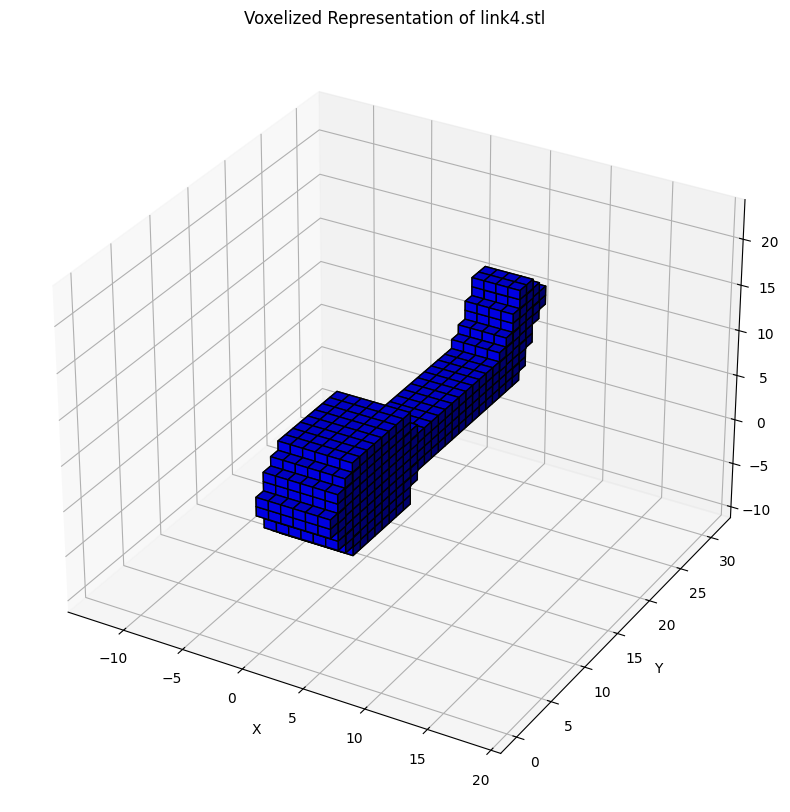

In [5]:
def display_random_voxel(mesh_dir, voxel_size=32):
    """
    Selects a random STL/OBJ file from the specified directory, voxelizes it,
    and displays the voxel representation using matplotlib with equal aspect ratios.
    
    Parameters:
    - mesh_dir (str): Path to the directory containing STL/OBJ files.
    - voxel_size (int): Resolution of the voxel grid.
    """
    # List all STL and OBJ files in the directory
    mesh_files = [f for f in os.listdir(mesh_dir) if f.lower().endswith(('.stl', '.obj'))]
    
    if not mesh_files:
        print("No STL or OBJ files found in the specified directory.")
        return
    
    # Select a random mesh file
    selected_mesh = random.choice(mesh_files)
    mesh_path = os.path.join(mesh_dir, selected_mesh)
    print(f"Selected Mesh: {selected_mesh}")
    
    # Load the mesh
    mesh = trimesh.load(mesh_path)
    
    if mesh.is_empty:
        print("The selected mesh is empty.")
        return
    
    # Voxelize the mesh
    # Ensure the pitch is set correctly based on the bounding box size
    pitch = mesh.scale / voxel_size if mesh.scale > 0 else 1.0 / voxel_size
    voxel = mesh.voxelized(pitch=pitch)
    
    if voxel is None:
        print("Voxelization failed.")
        return
    
    # Get the voxel matrix
    matrix = voxel.matrix
    
    # Plotting
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create a boolean mask where voxels are present
    filled = matrix
    
    # Plot voxels
    ax.voxels(filled, facecolors='blue', edgecolor='k')
    
    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Voxelized Representation of {selected_mesh}')
    
    # Ensure equal aspect ratio
    set_axes_equal(ax)
    
    plt.show()

def set_axes_equal(ax):
    """
    Sets equal aspect ratio for 3D plots.
    
    Parameters:
    - ax (mpl_toolkits.mplot3d.Axes3D): The 3D axes to adjust.
    """
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity norm, hence max range
    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# Define the directory containing your STL/OBJ files
mesh_directory = './stl_models/'

# Display a random voxelized mesh
display_random_voxel(mesh_directory, voxel_size=32)

In [6]:
mesh_dir = './stl_models/'         # Directory containing your CAD models
image_dir = './rendered_images/'   # Directory to save rendered images
voxel_dir = './voxel_data/'        # Directory to save voxel grids
os.makedirs(voxel_dir, exist_ok=True)

# Generate images and voxel grids
for mesh_file in os.listdir(mesh_dir):
    if mesh_file.lower().endswith(('.stl', '.obj')):
        mesh_path = os.path.join(mesh_dir, mesh_file)
        # Set pyrender to use osmesa for offscreen rendering
        pyrender.OffscreenRenderer._platform = 'osmesa'
        
        # Render images
        render_images_and_save(mesh_path, image_dir, num_views=10, image_size=64)
        
        # Save voxel grid
        voxel_data = mesh_to_voxel(mesh_path, voxel_dim=32)
        voxel_filename = os.path.splitext(mesh_file)[0] + '.npy'
        np.save(os.path.join(voxel_dir, voxel_filename), voxel_data)
        print(f"Voxelized and saved {voxel_filename}")


Rendered and saved link3_0.png
Rendered and saved link3_1.png
Rendered and saved link3_2.png
Rendered and saved link3_3.png
Rendered and saved link3_4.png
Rendered and saved link3_5.png
Rendered and saved link3_6.png
Rendered and saved link3_7.png
Rendered and saved link3_8.png
Rendered and saved link3_9.png
Voxelized and saved link3.npy
Rendered and saved link2_0.png
Rendered and saved link2_1.png
Rendered and saved link2_2.png
Rendered and saved link2_3.png
Rendered and saved link2_4.png
Rendered and saved link2_5.png
Rendered and saved link2_6.png
Rendered and saved link2_7.png
Rendered and saved link2_8.png
Rendered and saved link2_9.png
Voxelized and saved link2.npy
Rendered and saved link0_0.png
Rendered and saved link0_1.png
Rendered and saved link0_2.png
Rendered and saved link0_3.png
Rendered and saved link0_4.png
Rendered and saved link0_5.png
Rendered and saved link0_6.png
Rendered and saved link0_7.png
Rendered and saved link0_8.png
Rendered and saved link0_9.png
Voxelized 

In [7]:
class PairedDataset(Dataset):
    def __init__(self, image_dir, voxel_dir):
        self.image_files = []
        self.voxel_files = []
        for image_file in os.listdir(image_dir):
            if image_file.endswith('.png'):
                mesh_name = '_'.join(image_file.split('_')[:-1])  # Extract mesh name
                voxel_file = mesh_name + '.npy'
                voxel_path = os.path.join(voxel_dir, voxel_file)
                if os.path.exists(voxel_path):
                    self.image_files.append(os.path.join(image_dir, image_file))
                    self.voxel_files.append(voxel_path)
        self.transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor()
        ])

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Load image
        image = Image.open(self.image_files[idx]).convert('L')
        image = self.transform(image)
        # Load voxel grid
        voxel = np.load(self.voxel_files[idx])
        voxel = torch.tensor(voxel, dtype=torch.float32)
        return {'image': image, 'voxel': voxel}


# Create dataset and dataloader
dataset = PairedDataset(image_dir, voxel_dir)
batch_size = 8
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
print(f'Total samples: {len(dataset)}')



Total samples: 50


# MODEL DEFINITIONS

In [10]:
class Generator(nn.Module):
    def __init__(self, voxel_dim=32):
        super(Generator, self).__init__()
        # Encoder: Convolutional layers to process 2D images
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),  # (batch_size, 64, 32, 32)
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            # Add more layers as needed
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 512),
            nn.ReLU(True)
        )
        # Decoder: Transpose convolutional layers to generate 3D voxel grid
        self.decoder = nn.Sequential(
            nn.Linear(512, voxel_dim ** 3),
            nn.Sigmoid()
        )
        self.voxel_dim = voxel_dim

    def forward(self, img):
        encoded = self.encoder(img)
        decoded = self.decoder(encoded)
        voxel_grid = decoded.view(-1, self.voxel_dim, self.voxel_dim, self.voxel_dim)
        return voxel_grid


In [11]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),  # Output: (batch_size, 64, 32, 32)
            nn.LeakyReLU(0.2, inplace=True),
            # Add more convolutional layers as needed
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)


In [13]:
# Instantiate models
voxel_dim = 32
G = Generator(voxel_dim).to(device)
D = Discriminator().to(device)


In [14]:
# Loss functions
adversarial_loss_fn = nn.BCELoss()
reconstruction_loss_fn = nn.MSELoss()

# Optimizers
lr = 0.0002
beta1 = 0.5
optimizer_G = optim.Adam(G.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=lr, betas=(beta1, 0.999))


In [15]:
def render_voxel(voxel_grid, num_views=1, image_size=64):
    batch_size = voxel_grid.size(0)
    images = []
    for i in range(batch_size):
        voxel = voxel_grid[i].detach().cpu().numpy()
        for _ in range(num_views):
            # Apply random rotation
            angles = np.random.uniform(0, 360, size=3)
            rotated_voxel = scipy.ndimage.rotate(voxel, angles[0], axes=(1, 2), reshape=False, order=0)
            rotated_voxel = scipy.ndimage.rotate(rotated_voxel, angles[1], axes=(0, 2), reshape=False, order=0)
            rotated_voxel = scipy.ndimage.rotate(rotated_voxel, angles[2], axes=(0, 1), reshape=False, order=0)
            # Plot voxel grid
            fig = plt.figure(figsize=(2, 2))
            ax = fig.add_subplot(111, projection='3d')
            ax.voxels(rotated_voxel > 0.5, facecolors='gray', edgecolor='k')
            ax.set_axis_off()
            # Capture the plot as an image
            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            plt.close(fig)
            # Convert to grayscale and resize
            image = Image.fromarray(image).convert('L').resize((image_size, image_size))
            image = transforms.ToTensor()(image)
            images.append(image)
    images = torch.stack(images, dim=0)
    return images.to(device)


In [65]:
num_epochs = 10
lambda_recon = 50  # Weight for reconstruction loss

for epoch in range(num_epochs):
    for i, data in enumerate(dataloader):
        # ---------------------
        #  Prepare Data
        # ---------------------
        real_images = data['image'].to(device)  # (batch_size, 1, 64, 64)
        real_voxels = data['voxel'].to(device)  # (batch_size, voxel_dim, voxel_dim, voxel_dim)
        batch_size = real_images.size(0)
        valid = torch.ones(batch_size, 1, device=device)
        fake = torch.zeros(batch_size, 1, device=device)

        # -----------------
        #  Train Generator
        # -----------------
        optimizer_G.zero_grad()

        # Generate voxel grid from image
        gen_voxels = G(real_images)

        # Reconstruction loss
        g_recon_loss = reconstruction_loss_fn(gen_voxels, real_voxels)

        # Render images from generated voxel grid
        rendered_images = render_voxel(gen_voxels, num_views=1, image_size=64)
        valid_labels = torch.ones(rendered_images.size(0), 1, device=device)

        # Adversarial loss
        g_adv_loss = adversarial_loss_fn(D(rendered_images), valid_labels)

        # Total generator loss
        g_loss = g_adv_loss + lambda_recon * g_recon_loss

        g_loss.backward()
        optimizer_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()

        # Discriminator loss on real images
        real_images_expanded = real_images.repeat(1, 1, 1, 1)  # Shape adjustment if needed
        d_real_loss = adversarial_loss_fn(D(real_images_expanded), valid)

        # Discriminator loss on fake images
        d_fake_loss = adversarial_loss_fn(D(rendered_images.detach()), fake)

        # Total discriminator loss
        d_loss = (d_real_loss + d_fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        # ---------------------
        #  Logging
        # ---------------------
        if i % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] Batch [{i}/{len(dataloader)}] '
                  f'Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}, '
                  f'Recon Loss: {g_recon_loss.item():.4f}')

    # Save model checkpoints if desired


/var/folders/yy/369dcxz16j5_3ymthbb030vh0000gq/T/ipykernel_24310/3071419007.py:19: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


Epoch [1/10] Batch [0/7] Loss D: 0.9779, Loss G: 3.3392, Recon Loss: 0.0574
Epoch [2/10] Batch [0/7] Loss D: 0.6910, Loss G: 1.9397, Recon Loss: 0.0280
Epoch [3/10] Batch [0/7] Loss D: 0.5935, Loss G: 1.5786, Recon Loss: 0.0132
Epoch [4/10] Batch [0/7] Loss D: 0.5889, Loss G: 1.6177, Recon Loss: 0.0221
Epoch [5/10] Batch [0/7] Loss D: 0.4388, Loss G: 3.9471, Recon Loss: 0.0621
Epoch [6/10] Batch [0/7] Loss D: 0.3697, Loss G: 3.4975, Recon Loss: 0.0374
Epoch [7/10] Batch [0/7] Loss D: 0.3949, Loss G: 3.2479, Recon Loss: 0.0174
Epoch [8/10] Batch [0/7] Loss D: 0.3203, Loss G: 3.2363, Recon Loss: 0.0252
Epoch [9/10] Batch [0/7] Loss D: 0.5792, Loss G: 1.0161, Recon Loss: 0.0089
Epoch [10/10] Batch [0/7] Loss D: 0.3031, Loss G: 1.7786, Recon Loss: 0.0111


In [22]:
def plot_voxel(voxel):
    voxel = voxel.detach().cpu().numpy()
    voxel = voxel > 0.5  # Threshold
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(voxel, edgecolor='k')
    plt.axis('off')
    plt.show()
    plt.close(fig)  # Close the figure to free up memory

def visualize_generated_images(voxels):
    rendered_images = render_voxel(voxels, num_views=5, image_size=64)
    grid_img = torchvision.utils.make_grid(rendered_images.cpu(), nrow=5, normalize=True)
    plt.figure(figsize=(15, 15))
    plt.imshow(grid_img.permute(1, 2, 0), cmap='gray')
    plt.axis('off')
    plt.show()


def render_voxel(voxel_grid, num_views=1, image_size=64):
    batch_size = voxel_grid.size(0)
    images = []
    for i in range(batch_size):
        voxel = voxel_grid[i].detach().cpu().numpy()
        for _ in range(num_views):
            # Apply random rotation
            angles = np.random.uniform(0, 360, size=3)
            rotated_voxel = scipy.ndimage.rotate(voxel, angles[0], axes=(1, 2), reshape=False, order=0)
            rotated_voxel = scipy.ndimage.rotate(rotated_voxel, angles[1], axes=(0, 2), reshape=False, order=0)
            rotated_voxel = scipy.ndimage.rotate(rotated_voxel, angles[2], axes=(0, 1), reshape=False, order=0)
            # Plot voxel grid
            fig = plt.figure(figsize=(2, 2))
            ax = fig.add_subplot(111, projection='3d')
            ax.voxels(rotated_voxel > 0.5, facecolors='gray', edgecolor='k')
            ax.set_axis_off()
            # Capture the plot as an image
            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.buffer_rgba(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
            image = image[:, :, :3]  # Keep RGB channels
            plt.close(fig)
            # Convert to grayscale and resize
            image = Image.fromarray(image).convert('L').resize((image_size, image_size))
            image = transforms.ToTensor()(image)
            images.append(image)
    images = torch.stack(images, dim=0)
    return images.to(device)


Sample 1:
Generated Voxel Grid:


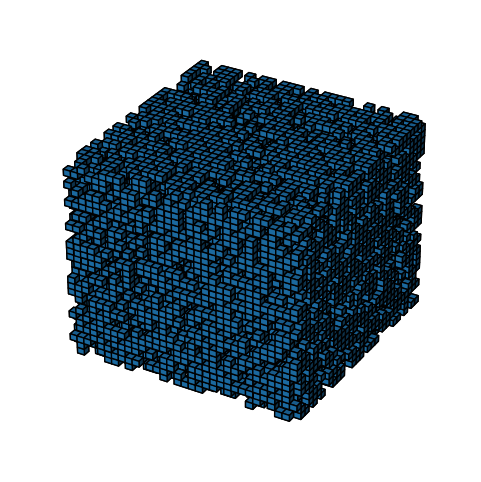

Ground Truth Voxel Grid:


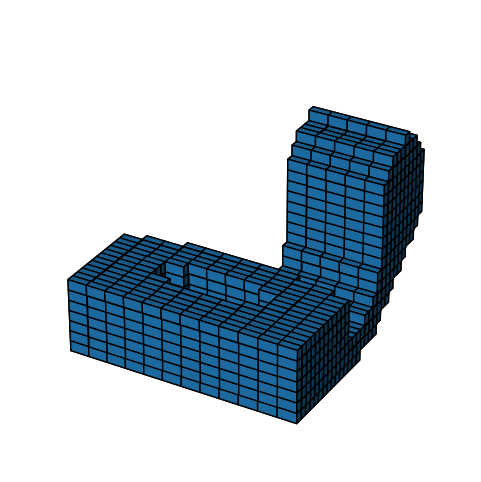

Rendered Images from Generated Voxel Grid:


In [ ]:
# Get a batch of data
data_iter = iter(dataloader)
data_sample = next(data_iter)
real_images = data_sample['image'].to(device)
real_voxels = data_sample['voxel'].to(device)

# Generate voxel grids
gen_voxels = G(real_images)

# Visualize generated voxel grids
for i in range(3):  # Display 3 samples
    print(f"Sample {i+1}:")
    print("Generated Voxel Grid:")
    plot_voxel(gen_voxels[i])
    print("Ground Truth Voxel Grid:")
    plot_voxel(real_voxels[i])
    print("Rendered Images from Generated Voxel Grid:")
    visualize_generated_images(gen_voxels[i].unsqueeze(0))

